In [1]:
import pandas as pd

# Load data
df = pd.read_csv(r"C:\Users\sahee\Desktop\Data Analysis projects\CASE_STUDIES\Customer Personality Analysis\marketing_data.csv")

# Preview the dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# 🔹 Q1: How many customers have Income above 50,000?

In [3]:
# Clean column names

df.columns = df.columns.str.strip()

# Filter customers with Income > 50000
high_income_customers = df[df['Income'] > 50000]
print("Number of customers with income > 50000:", high_income_customers.shape[0])

Number of customers with income > 50000: 1156


### Observation:
A total of 1,156 customers have income greater than 50,000.

### Conclusion:
These high-income customers represent a premium segment and can be targeted for exclusive offers.

# 🔹 Q2: How much money was spent on wine and what is its percentage of overall spend?

In [4]:
# Calculate total spent per customer and overall
df['total_spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
total_wine = df['MntWines'].sum()
total_all = df['total_spent'].sum()
wine_pct = (total_wine / total_all) * 100
print(f"Total wine spent: {total_wine}, Percentage: {wine_pct:.2f}%")

Total wine spent: 680816, Percentage: 50.17%


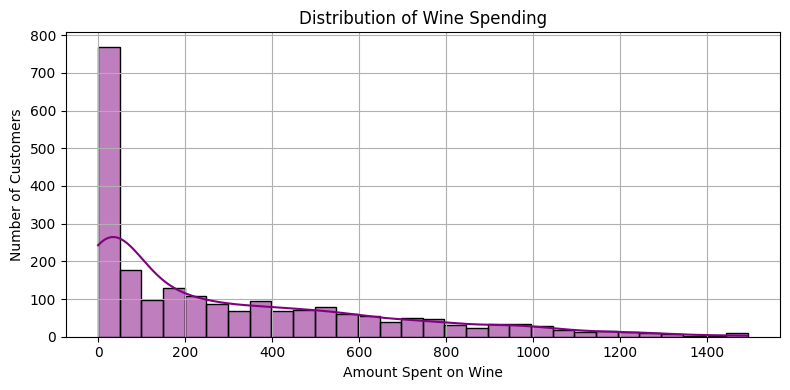

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.histplot(df['MntWines'], bins=30, kde=True, color='purple')
plt.title('Distribution of Wine Spending')
plt.xlabel('Amount Spent on Wine')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.show()

### Observation:
Wine accounts for 50.17% of all customer spending.

### Conclusion:
Wine is the top-selling category. Promotions and bundles in this segment may boost overall sales.

 # Q3: In which year is the maximum amount spent by customers?

In [9]:
# Convert date and extract year
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Year'] = df['Dt_Customer'].dt.year

# Group by year and sum total spending
yearly_spend = df.groupby('Year')['total_spent'].sum().sort_values(ascending=False)

In [10]:
print(yearly_spend)

Year
2013    715425
2012    368269
2014    273294
Name: total_spent, dtype: int64


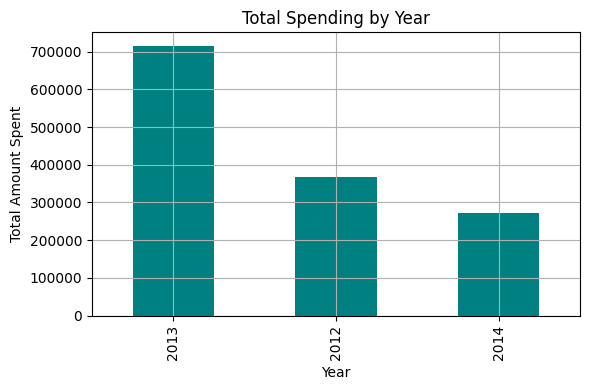

In [11]:

yearly_spend.plot(kind='bar', color='teal', figsize=(6,4))
plt.title('Total Spending by Year')
plt.ylabel('Total Amount Spent')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

### Observation:
2013 had the highest overall customer spending.

### Conclusion:
Customers acquired in 2013 are high value; the marketing strategy used then may be worth revisiting.

# 🔹 Q4: Which month has the highest average income and who are the top 10 customers from that month?

In [12]:
# Extract month
df['Month'] = df['Dt_Customer'].dt.month

# Find month with highest average income
max_income_month = df.groupby('Month')['Income'].mean().idxmax()

In [13]:
# Filter and display top 10 high-income customers from that month
top_customers = df[df['Month'] == max_income_month].sort_values(by='Income', ascending=False).head(10)
print("Top 10 high income customers from month:", max_income_month)
print(top_customers[['ID', 'Income']])

Top 10 high income customers from month: 6
         ID    Income
527    9432  666666.0
731    1503  162397.0
853    5336  157733.0
1652   4278   87188.0
1643   9400   85485.0
1234   8584   85431.0
1653   6906   84953.0
0      1826   84835.0
1628   6945   84574.0
1288  10156   84196.0


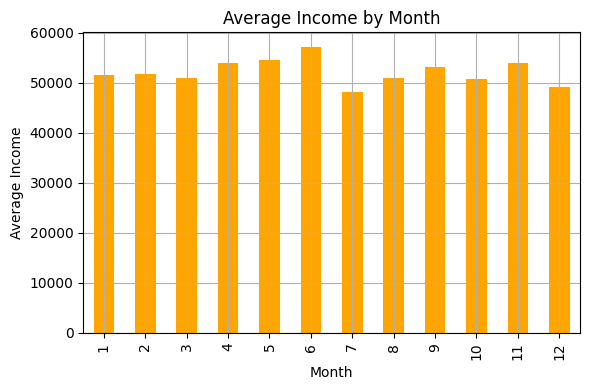

In [14]:

monthly_income = df.groupby('Month')['Income'].mean()
monthly_income.plot(kind='bar', color='orange', figsize=(6,4))
plt.title('Average Income by Month')
plt.xlabel('Month')
plt.ylabel('Average Income')
plt.grid(True)
plt.tight_layout()
plt.show()

### Observation:
June had the highest income; top customers earn over ₹100,000.

### Conclusion:
June is ideal for launching high-end offers for premium segments.

# 🔹 Q5: Total spent on each product and its percentage

In [15]:
# Sum and calculate % share of categories
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 
              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
totals = df[categories].sum()
totals_pct = (totals / totals.sum()) * 100

print(pd.DataFrame({'Total Spent': totals, 'Percentage': totals_pct.round(2)}))

                  Total Spent  Percentage
MntWines               680816       50.17
MntFruits               58917        4.34
MntMeatProducts        373968       27.56
MntFishProducts         84057        6.19
MntSweetProducts        60621        4.47
MntGoldProds            98609        7.27


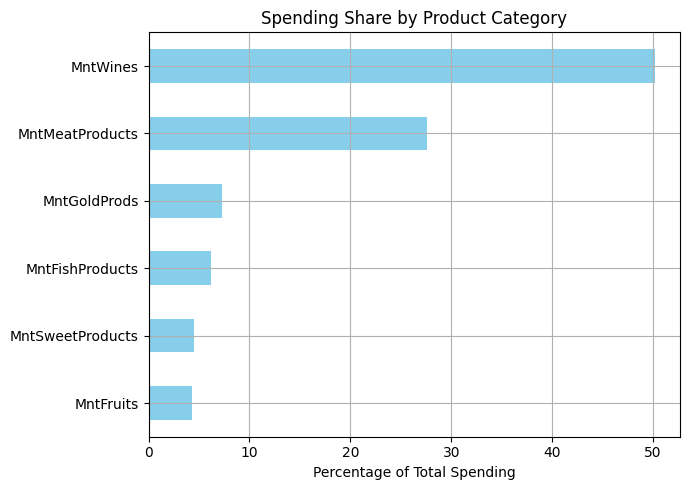

In [16]:
plt.figure(figsize=(7,5))
totals_pct.sort_values().plot(kind='barh', color='skyblue')
plt.title('Spending Share by Product Category')
plt.xlabel('Percentage of Total Spending')
plt.grid(True)
plt.tight_layout()
plt.show()

### Observation:
Wine and Meat dominate spending; Fruit and Sweets have the smallest share.

### Conclusion:
Promote underperforming categories like Fruits and Sweets to improve balance.

# 🔹 Q6: Total amount spent per weekday and its percentage

In [17]:
# Extract weekday from date
df['Weekday'] = df['Dt_Customer'].dt.day_name()

# Group and calculate totals and percentages
weekday_spent = df.groupby('Weekday')['total_spent'].sum()
weekday_pct = (weekday_spent / weekday_spent.sum()) * 100

print(pd.DataFrame({'Total Spent': weekday_spent, 'Percentage': weekday_pct.round(2)}))

           Total Spent  Percentage
Weekday                           
Friday          215510       15.88
Monday          219658       16.19
Saturday        198883       14.66
Sunday          175887       12.96
Thursday        167978       12.38
Tuesday         167111       12.31
Wednesday       211961       15.62


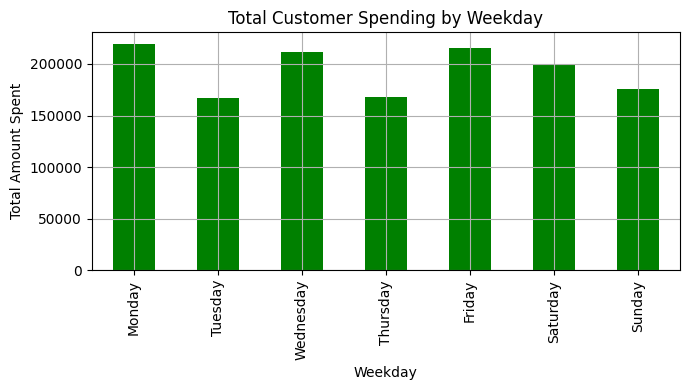

In [18]:
weekday_spent = weekday_spent.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
weekday_spent.plot(kind='bar', color='green', figsize=(7,4))
plt.title('Total Customer Spending by Weekday')
plt.ylabel('Total Amount Spent')
plt.xlabel('Weekday')
plt.grid(True)
plt.tight_layout()
plt.show()

### Observation:
Mondays and Fridays show the highest spending.

### Conclusion:
Plan campaigns on Monday and Friday to capture peak consumer activity.